In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

In [30]:
#matplotlib 패키지 한글 깨짐 처리 시작
#한글 폰트(맑은 고딕) 적용 : 윈도우, 구글 콜랩
matplotlib.rc('font', family = "Malgun Gothic")
plt.rc('font', family = "Malgun Gothic")

#seaborn에서 한글 깨짐 해결
#minus 깨짐현상 방지
plt.rcParams['axes.unicode_minus'] = False

In [18]:
df_raw = pd.read_csv("./Data/FITNESS_결측.csv", engine="python", encoding="cp949")

In [19]:
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


## Step2. 결측치 확인 및 처리

In [20]:
df_raw.isnull().head()
# df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [23]:
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [21]:
# 이산형 변수 결측치 
df_raw["GENDER"].fillna("여성", inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [24]:
# 숫자형 변수 결측치: gropuby(범주형 변수), agg("집계함수")
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [29]:
# 숫자형 결측치 처리: transform("집계함수")
# \표시시 자동 줄 바꿈
df_raw["WEIGHT"] = \
df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [31]:
# 결측치 확인하는 코드
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

## Step3 이상치 확인 및 처리: boxplot을 이용한 이상치

<AxesSubplot:>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


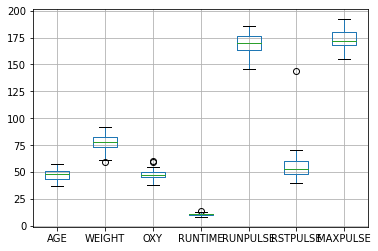

In [32]:
df_raw.boxplot()

<AxesSubplot:>

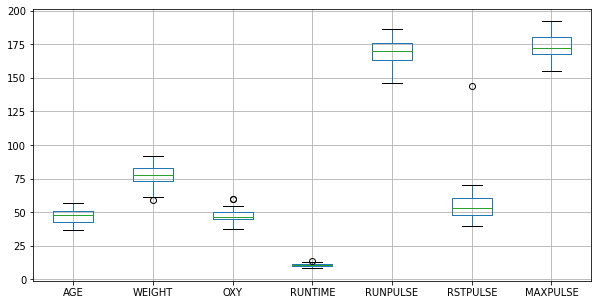

In [33]:
# boxplot사이즈 조절 => figsize:그래프크기(x축, y축)
df_raw.boxplot(figsize = (10, 5))

In [34]:
df_raw[df_raw["RSTPULSE"] >=100]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [35]:
# 100보다 큰 것을 뺴고 새로운 df를 만든다.
df_fitness = df_raw[df_raw["RSTPULSE"] <100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [36]:
# 인덱스 재정렬
df_fitness.reset_index(drop=True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


## Step4. Scale 변환
- 변환대상 변수 = 숫자형 변수
- select_dtypes = "object" 제외

In [37]:
df_fitness_num = df_fitness.select_dtypes(exclude = "object")
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


### Scale변환(standard, 평균 = 0, 표준편차 = 1)

In [38]:
df_scale_std = scale(df_fitness_num)

In [39]:
# scale적용, 변환하면 numpy의 ndarray 형태로 저장되므로 변환필요

df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.806,-1.119,2.335,-1.772,-0.361,-1.857,-0.200
1,-1.507,0.607,2.429,-1.423,0.029,-0.778,1.329
2,-0.631,1.106,1.302,-1.408,-1.337,-1.182,-0.637
3,0.596,-0.777,1.366,-1.204,-2.313,-0.778,-2.056
4,0.421,0.678,0.295,-1.181,1.005,-1.317,1.219


In [40]:
# scale변환 결과 확인: 요약통계량
df_scale_std.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


 ※결과: scale반환을 통해 평균=0. 표준편차=1인 데이터로 변환

### Scale변환(minmax)

In [43]:
df_scale_minmax = minmax_scale(df_fitness_num)

df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.279,0.979,0.000,0.50,0.000,0.459
1,0.05,0.700,1.000,0.078,0.60,0.267,0.838
2,0.30,0.822,0.746,0.082,0.25,0.167,0.351
3,0.65,0.362,0.760,0.128,0.00,0.267,0.000
4,0.60,0.717,0.519,0.133,0.85,0.133,0.811


In [45]:
df_scale_minmax.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Scale변환(robust_scale, 중앙값 = 0, IQR = 1 변환)

In [46]:
df_scale_robust = robust_scale(df_fitness_num)

df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.688,-0.937,2.464,-1.535,-0.296,-1.163,0.000
1,-1.188,0.535,2.559,-1.219,0.000,-0.419,1.167
2,-0.562,0.961,1.428,-1.205,-1.037,-0.698,-0.333
3,0.312,-0.646,1.493,-1.019,-1.778,-0.419,-1.417
4,0.188,0.595,0.419,-0.998,0.741,-0.791,1.083


In [47]:
# median을 0로 두고, IQR을 1로 둔다. (IQR은 1사분면 - 3사분면 값 =  1)
df_scale_robust.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


### Scale 변환결과 비교
- scale변환을 했었을 때 분포가 변하면, 특성이 달라지는 것이므로 못 쓰게 된다.
- 예시로 RSTPULSE 변수만 비교

In [51]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


array([[<AxesSubplot:title={'center':'Raw'}>,
        <AxesSubplot:title={'center':'Standard'}>],
       [<AxesSubplot:title={'center':'MinMax'}>,
        <AxesSubplot:title={'center':'Robust'}>]], dtype=object)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


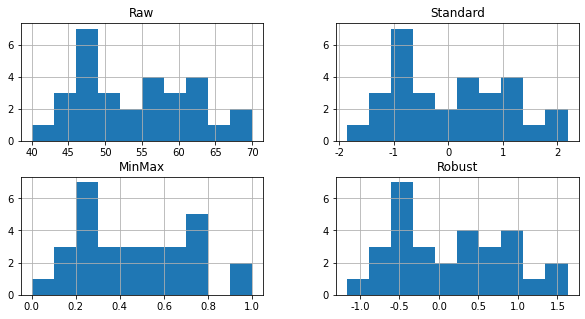

In [52]:
# 히스토 그램은 막대를 몇 개 세우냐에 따라서 분포가 살짝 달라질 수 있다.
df_rstpulse[["Raw", "Standard", "MinMax", "Robust"]].hist(figsize = (10, 5))

# MinMax는 그래프가 달라졌는데 그 이유는 막대가 달라졌기 때문이다.